# EDA and Visualisation of Life Expectancy and GDP

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Project scoping
Properly scoping your project will greatly benefit you; scoping creates structure while requiring you to think through your entire project before you begin. 
- You should start with stating the goals for your project, 
- then gathering the data, 
- and considering the analytical steps required.  

A proper project scope can be a great road map for your project, but keep in mind that some down-stream tasks may become dead ends which will require adjustment to the scope.

## Some initial ideas
- Identify the time frame
- Identify the countries involved
- Group countries to high life expectation using the total median over all time
- Total GDP Vs Life expectancy for all countries
- Total GDP Vs Life expectancy using high Vs low split
- Do countries change positive or negative over time

## Some initial EDA

In [2]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
# describe the df
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


### General information
From the above data frame it is possible to see that overall the:
- Average life expenctancy is 72.7 years
- The median is 76.75 showing a slight data skew to some low expectancy
- The difference between the min and max is 37 years
- The mean Vs median GDP has a difference of \$1b meaning ~10\% difference between countries
- The difference between the min and max is ~$4b dollars
- The year span is from 2000 to 2015

In [9]:
# shape of the df
df_shape = df.shape
df_len = df_shape[0]
df_column_len = df_shape[1]

In [5]:
# Types of data in each column
df.dtypes

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

In [10]:
# identify unique countries
unique_countries = df['Country'].unique()
unique_countries_len = len(unique_countries)

## Plotting data
Line plots to show any changes in life expectancy and GDP, per country, over time.

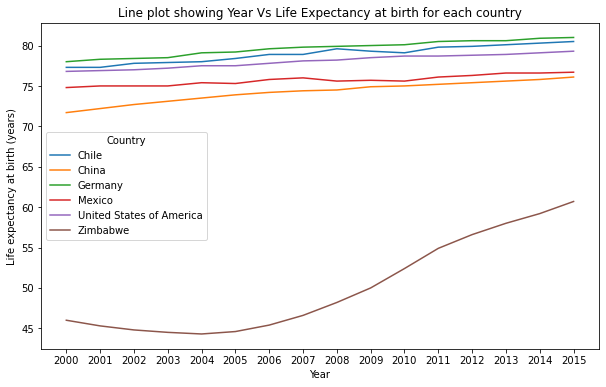

In [31]:
plt.figure(figsize=(10,6))
g = sns.lineplot(data=df, x='Year', y='Life expectancy at birth (years)', hue='Country')
g.set_xticks(range(2000, 2016))
g.set_title('Line plot showing Year Vs Life Expectancy at birth for each country')
plt.show()

As time went on most countries increased their life expectancy, with the exception of Zimbabwe which decreased before increasing rapidly.
As per the article linked below, Zimbabwe was under chromic inflation and an AIDS crisis during these times. It also seems the increase coincided with the fall of the Mugabe regime

https://reliefweb.int/report/zimbabwe/zimbabwe-adult-population-die-age-40-says-un-report

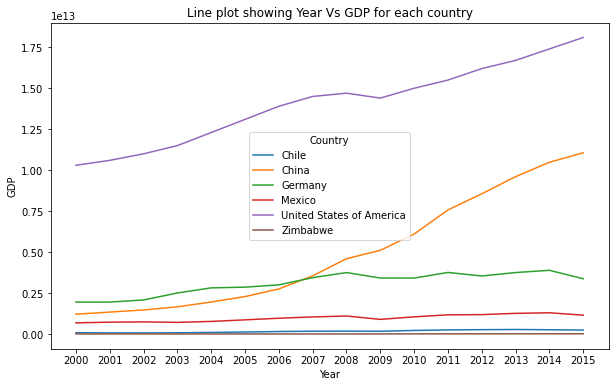

In [32]:
plt.figure(figsize=(10,6))
g = sns.lineplot(data=df, x='Year', y='GDP', hue='Country')
g.set_xticks(range(2000, 2016))
g.set_title('Line plot showing Year Vs GDP for each country')
plt.show()

From this data we can see there is a large increase in the American and Chinese GDP with a slight blip at the 2008 financial crash for USA. Interestingly this was not the case for China as the trend never decreased.

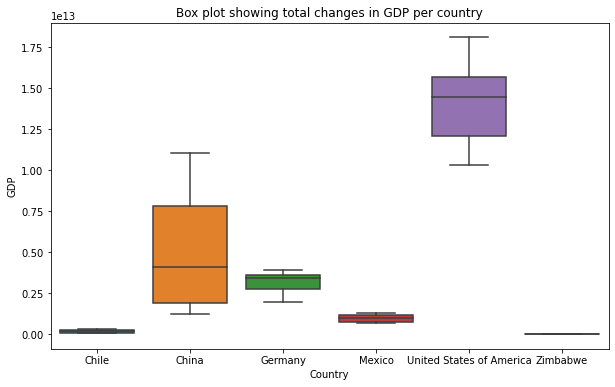

In [44]:
plt.figure(figsize=(10,6))
g = sns.boxplot(data=df, x='Country', y='GDP')
g.set_title('Box plot showing total changes in GDP per country')
plt.show()

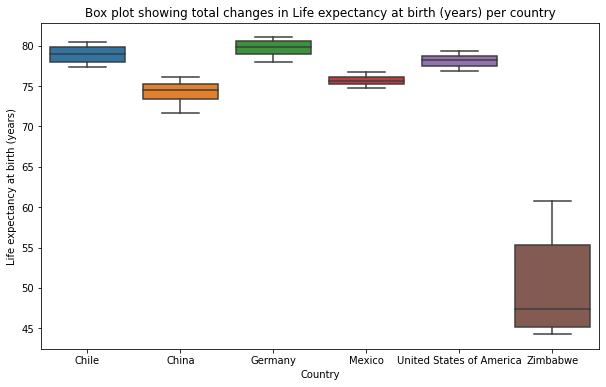

In [47]:
plt.figure(figsize=(10,6))
g = sns.boxplot(data=df, x='Country', y='Life expectancy at birth (years)')
g.set_title('Box plot showing total changes in Life expectancy at birth (years) per country')
plt.show()

The box plots clearly show the difference between Zimbabwe and the other countries both in terms of wealth and longevity.

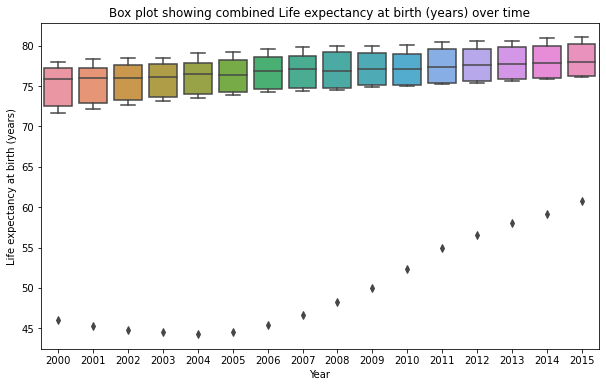

In [51]:
plt.figure(figsize=(10,6))
g = sns.boxplot(data=df, x='Year', y='Life expectancy at birth (years)')
g.set_title('Box plot showing combined Life expectancy at birth (years) over time')
plt.show()

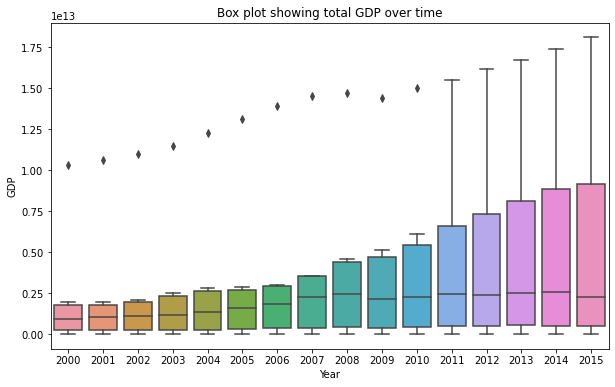

In [52]:
plt.figure(figsize=(10,6))
g = sns.boxplot(data=df, x='Year', y='GDP')
g.set_title('Box plot showing total GDP over time')
plt.show()

By changing the x-axis to year we can see that there is a (relatively) small discrepancy between all countries life expectancy with Zimbabwe being a high outlier. Similarly this is the case with GDP with USA being the high outlier.

### Correlating GDP and life expectancy

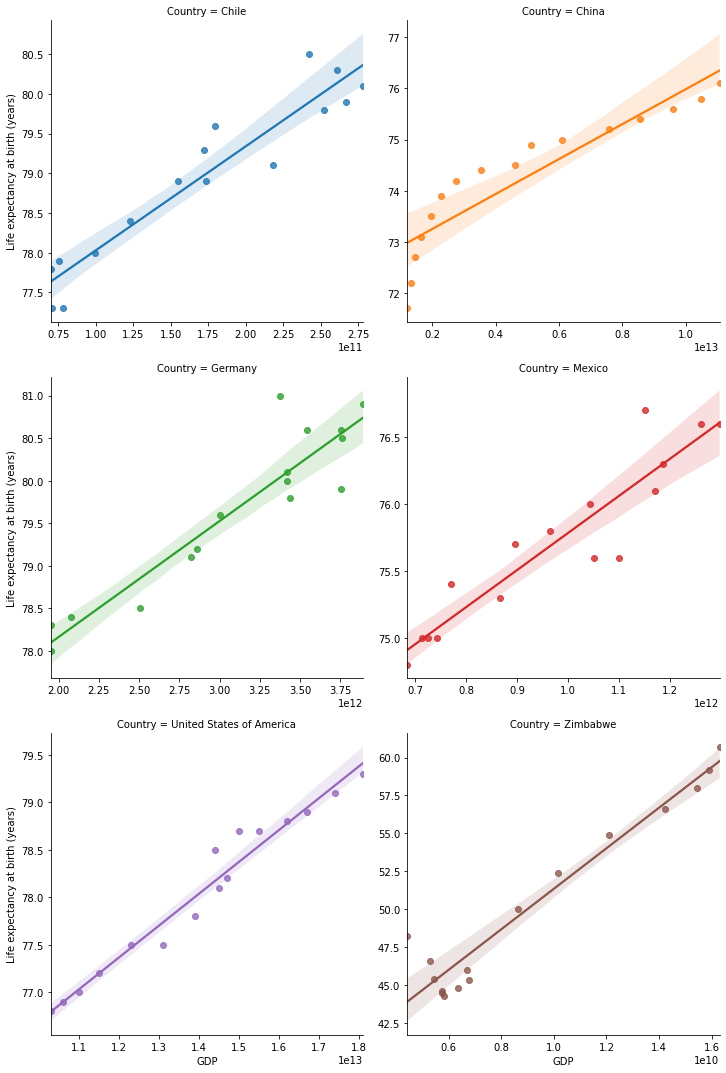

In [76]:
g = sns.lmplot(data=df, x='GDP', y='Life expectancy at birth (years)', 
           hue='Country', col='Country', col_wrap=2, sharex=False, sharey=False)
#plt.title(f'Graph showing the correlation of GDP to Life expectancy at birth (years) for {country}')
plt.show()

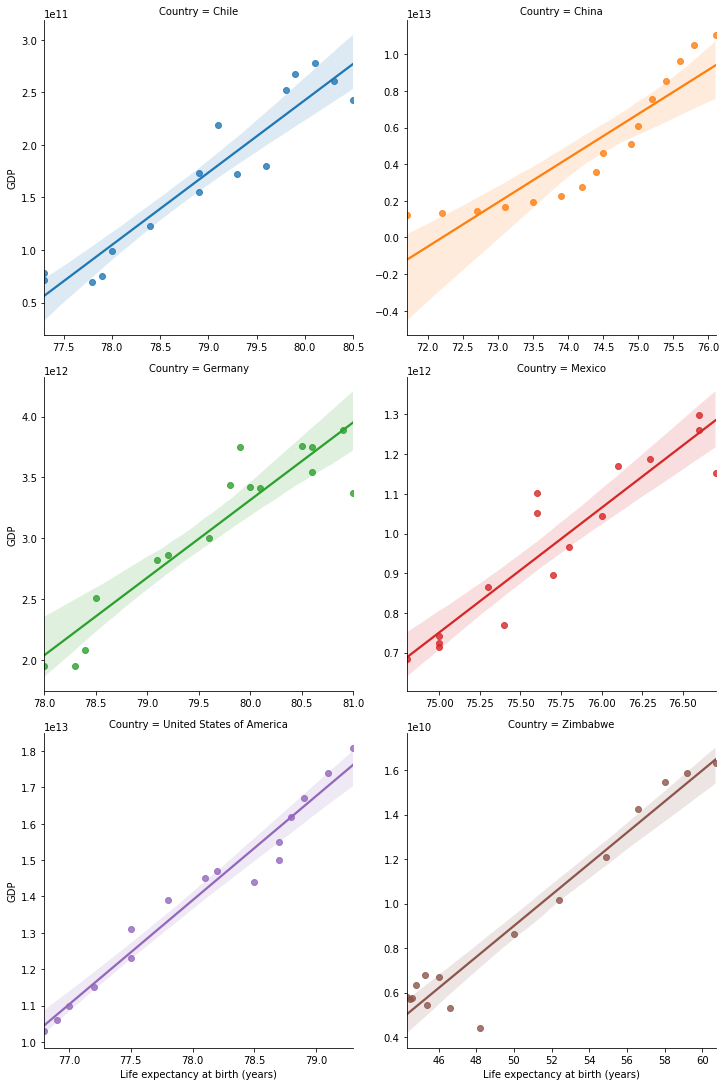

In [89]:
g = sns.lmplot(data=df, x='Life expectancy at birth (years)', y='GDP', 
           hue='Country', col='Country', col_wrap=2, sharex=False, sharey=False)
#plt.title(f'Graph showing the correlation of GDP to Life expectancy at birth (years) for {country}')
plt.show()

In [85]:
corr_dict = {}
for country in unique_countries:
    temp_df =  df[df['Country'] == country]
    corr_num = np.round(temp_df['Life expectancy at birth (years)'].corr(temp_df['GDP']),2)
    corr_dict[country] = corr_num
    print(f'The correlation of GDP to life expectancy in {country} is {corr_num}.')
#print(corr_dict)

The correlation of GDP to life expectancy in Chile is 0.95.
The correlation of GDP to life expectancy in China is 0.91.
The correlation of GDP to life expectancy in Germany is 0.93.
The correlation of GDP to life expectancy in Mexico is 0.93.
The correlation of GDP to life expectancy in United States of America is 0.98.
The correlation of GDP to life expectancy in Zimbabwe is 0.97.


From this initial research it is possible to show that regardless of the amount of money and the overall life expectancy, they are almost perfectly correlated.

## Specific differences
Looking at the total change in the GDP change and the life expectancy change as a method of seeing progress.

### Interesting things to look at and keep in mind

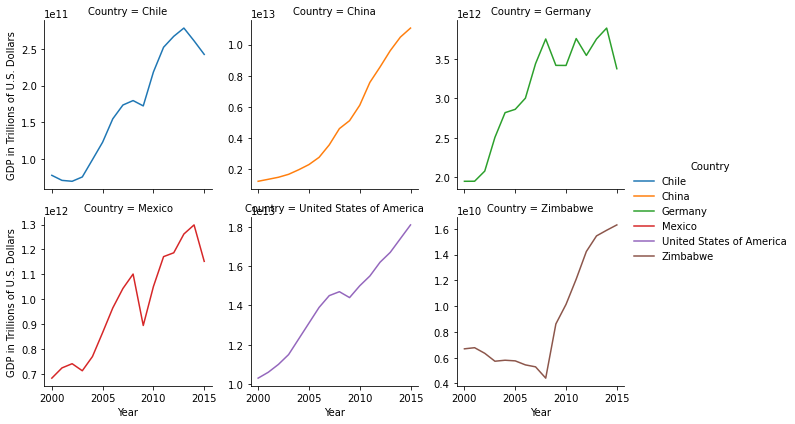

In [91]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

graphGDP;

### How to order suplots!!

C:\Users\mploc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mploc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


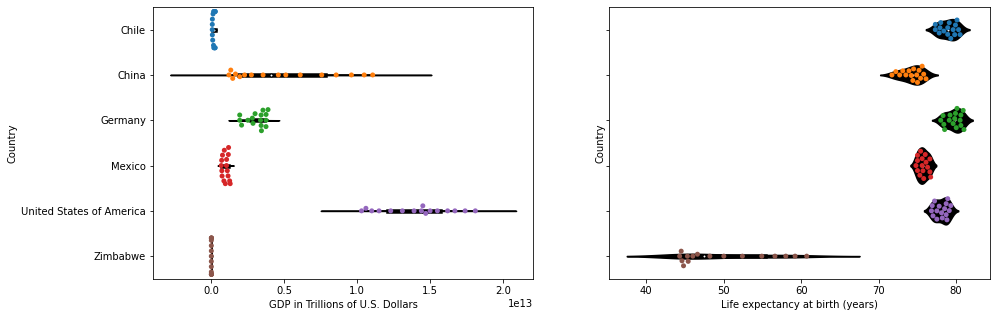

In [93]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country,color = "black")
axes[0] = sns.swarmplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=df['Life expectancy at birth (years)'], y=df.Country, color = "black")
axes[1] = sns.swarmplot(ax=axes[1], x=df['Life expectancy at birth (years)'], y=df.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");